## CNNs, Datasets and DataLoaders

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

In [6]:
def get_train_transform(image_size=512):
    train_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])
    return train_transform

In [7]:
def get_test_transform(image_size=512):
    valid_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])
    return valid_transform


In [75]:
torchvision.datasets.CIFAR10()??

SyntaxError: invalid syntax (2374435515.py, line 1)

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform;=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


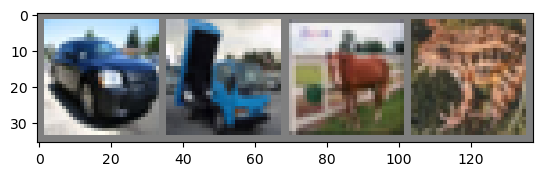

car   truck horse frog 


In [76]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

$$\mathbb{R}^{BxHxWxC}$$

In [10]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # fxhxw
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [77]:
sum(param.numel() for param in net.parameters())

62006

In [78]:
net.parameters

<bound method Module.parameters of Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [13]:
net?

In [79]:
dir(net)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook'

In [15]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 5

In [16]:
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.204
[1,  4000] loss: 1.829
[1,  6000] loss: 1.639
[1,  8000] loss: 1.557
[1, 10000] loss: 1.495
[1, 12000] loss: 1.428
[2,  2000] loss: 1.359
[2,  4000] loss: 1.362
[2,  6000] loss: 1.333
[2,  8000] loss: 1.314
[2, 10000] loss: 1.312
[2, 12000] loss: 1.297
[3,  2000] loss: 1.231
[3,  4000] loss: 1.230
[3,  6000] loss: 1.222
[3,  8000] loss: 1.193
[3, 10000] loss: 1.194
[3, 12000] loss: 1.168
[4,  2000] loss: 1.109
[4,  4000] loss: 1.115
[4,  6000] loss: 1.121
[4,  8000] loss: 1.094
[4, 10000] loss: 1.124
[4, 12000] loss: 1.110
[5,  2000] loss: 1.014
[5,  4000] loss: 1.039
[5,  6000] loss: 1.064
[5,  8000] loss: 1.057
[5, 10000] loss: 1.050
[5, 12000] loss: 1.026
Finished Training


In [80]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

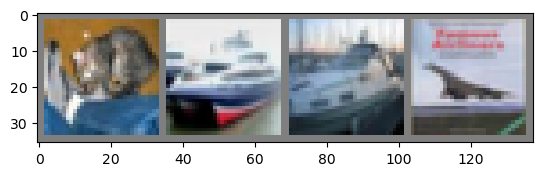

GroundTruth:  cat   ship  ship  plane


In [81]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [82]:
net = Net()
net.load_state_dict(torch.load(PATH))
net.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [83]:
outputs = net(images)

In [84]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  ship 


In [85]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 59 %


In [86]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 61.0 %
Accuracy for class: car   is 80.0 %
Accuracy for class: bird  is 40.0 %
Accuracy for class: cat   is 29.9 %
Accuracy for class: deer  is 44.6 %
Accuracy for class: dog   is 69.7 %
Accuracy for class: frog  is 76.1 %
Accuracy for class: horse is 55.1 %
Accuracy for class: ship  is 79.5 %
Accuracy for class: truck is 56.9 %


In [87]:
import warnings

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms

warnings.filterwarnings("ignore")

In [88]:
img = torchvision.io.read_image("astronaut.jpg")

# Using GPU if available
if torch.cuda.is_available():
    img = img.to("cuda")

In [89]:
img.shape

torch.Size([3, 512, 512])

In [90]:
def display_img(img: torch.Tensor) -> None:
    plt.imshow(img.permute(1, 2, 0).cpu())

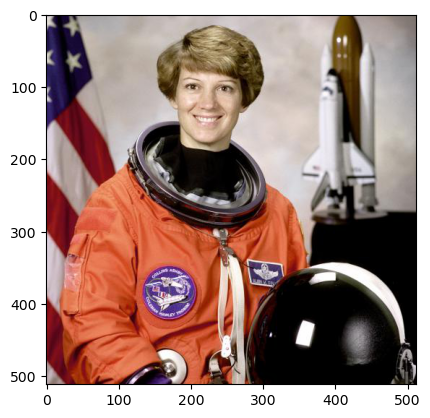

In [91]:
display_img(img)

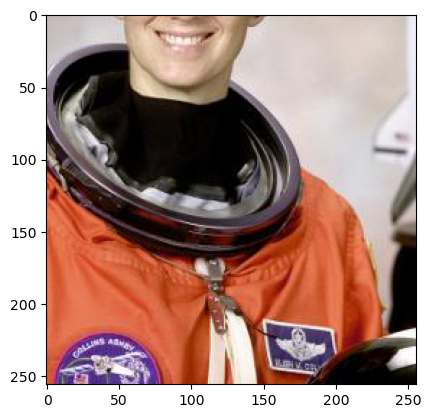

In [93]:
x = transforms.CenterCrop([256, 256])
display_img(x.forward(img))

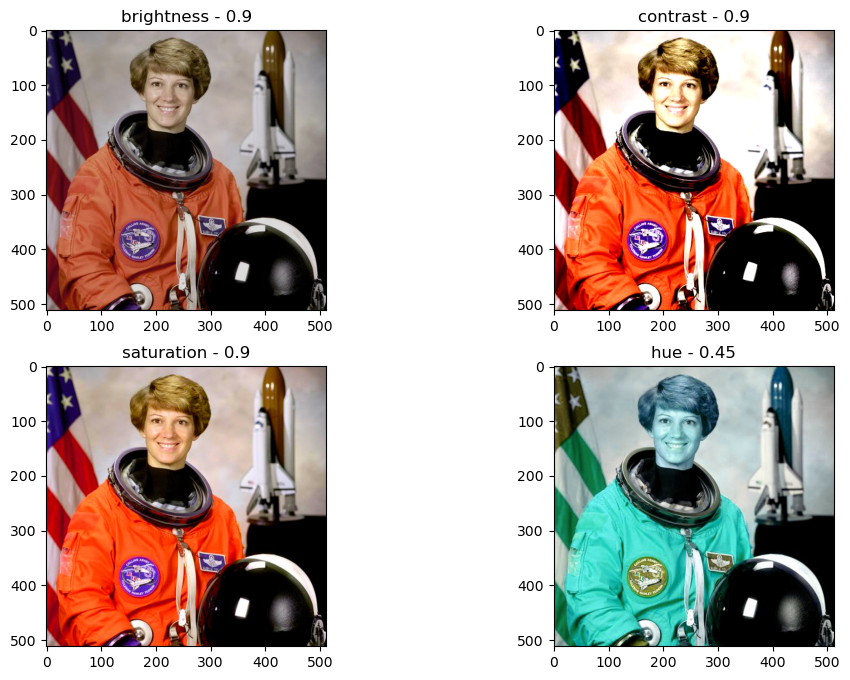

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
NUM = 0.9
x = transforms.ColorJitter(brightness=NUM)
ax[0, 0].imshow(x.forward(img).permute(1, 2, 0).cpu())
ax[0, 0].set_title(f"brightness - {NUM}")
x = transforms.ColorJitter(contrast=NUM)
ax[0, 1].imshow(x.forward(img).permute(1, 2, 0).cpu())
ax[0, 1].set_title(f"contrast - {NUM}")
x = transforms.ColorJitter(saturation=NUM)
ax[1, 0].imshow(x.forward(img).permute(1, 2, 0).cpu())
ax[1, 0].set_title(f"saturation - {NUM}")
x = transforms.ColorJitter(hue=0.45)
ax[1, 1].imshow(x.forward(img).permute(1, 2, 0).cpu())
ax[1, 1].set_title(f"hue - 0.45")
fig.show()

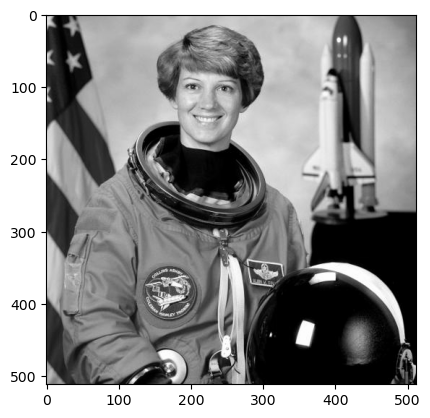

In [36]:
x = transforms.Grayscale(num_output_channels=3)
display_img(x.forward(img))

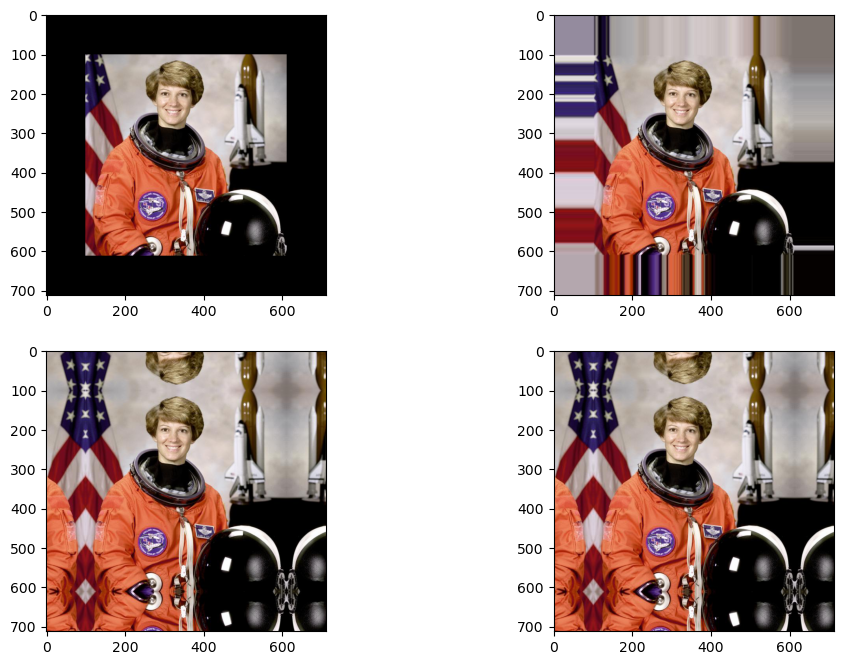

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
NUM = 100
x = transforms.Pad(NUM, padding_mode="constant")
ax[0, 0].imshow(x.forward(img).permute(1, 2, 0).cpu())
x = transforms.Pad(NUM, padding_mode="edge")
ax[0, 1].imshow(x.forward(img).permute(1, 2, 0).cpu())
x = transforms.Pad(NUM, padding_mode="reflect")
ax[1, 0].imshow(x.forward(img).permute(1, 2, 0).cpu())
x = transforms.Pad(NUM, padding_mode="symmetric")
ax[1, 1].imshow(x.forward(img).permute(1, 2, 0).cpu())
fig.show()

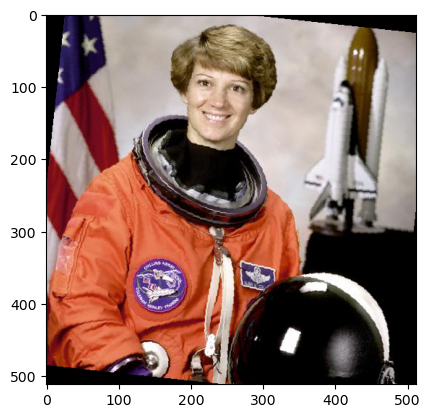

In [104]:
x = transforms.RandomAffine(30)
display_img(x.forward(img))

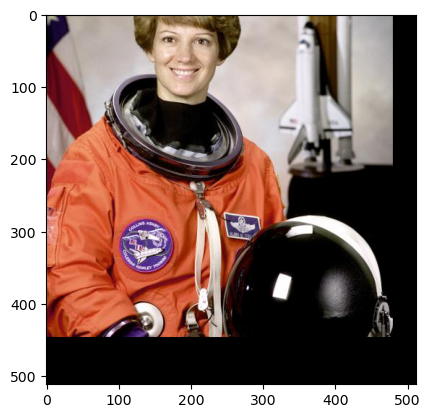

In [108]:
x = transforms.RandomAffine(0, translate=(0.2, 0.2))
display_img(x.forward(img))

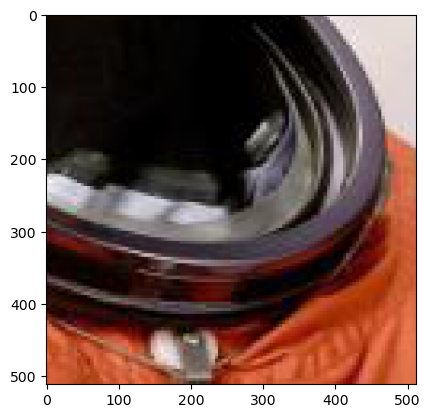

In [40]:
x = transforms.RandomAffine(0, scale=(0.5, 5))
display_img(x.forward(img))

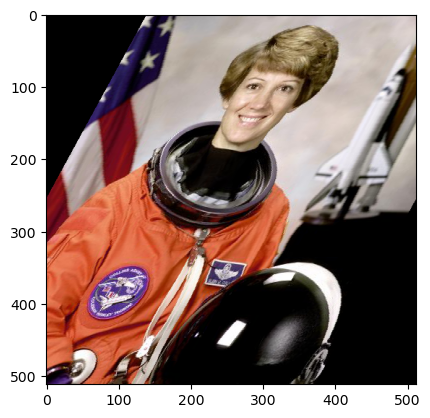

In [41]:
x = transforms.RandomAffine(0, shear=45)
display_img(x.forward(img))

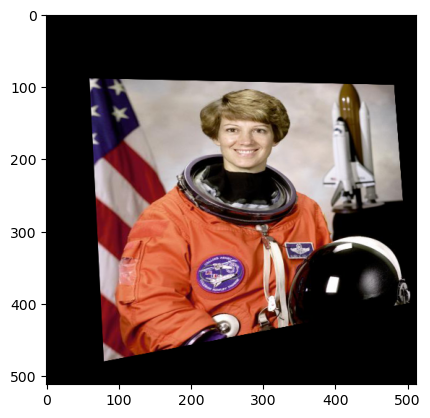

In [42]:
x = transforms.RandomPerspective(distortion_scale=0.5, p=0.9)
display_img(x.forward(img))

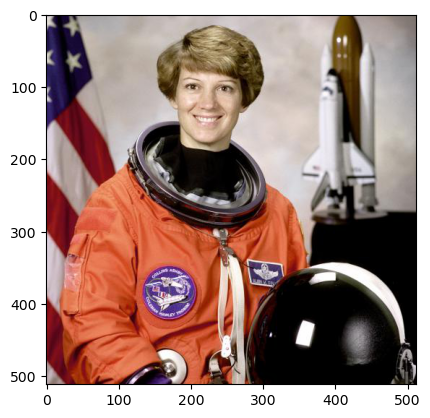

In [110]:
x = transforms.RandomHorizontalFlip(p=0.5)
display_img(x.forward(img))

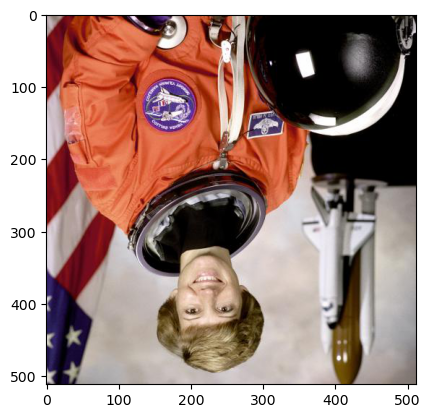

In [112]:
x = transforms.RandomVerticalFlip(p=0.5)
display_img(x.forward(img))

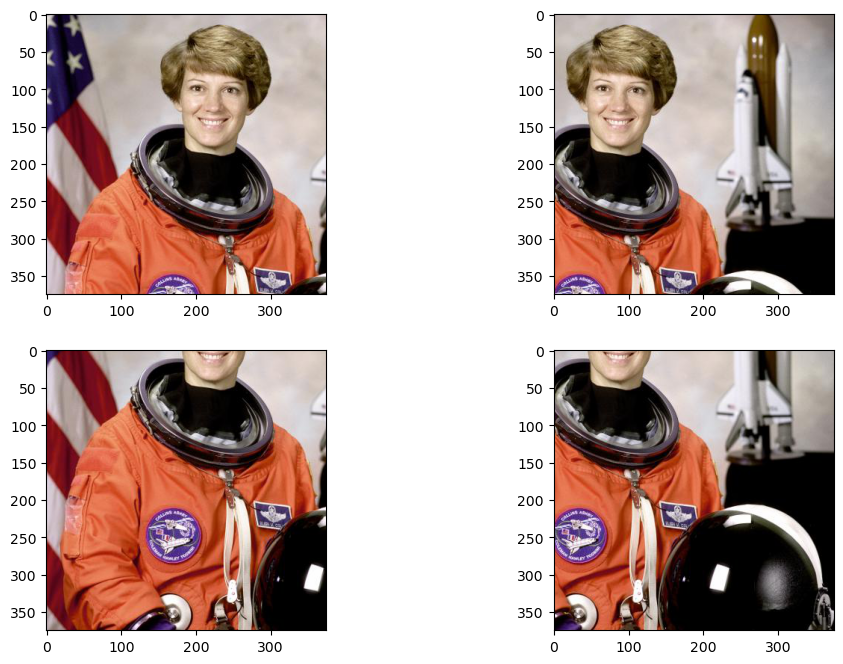

In [114]:
x = transforms.FiveCrop([375, 375])
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
figs = x.forward(img)
ax[0, 0].imshow(figs[0].permute(1, 2, 0).cpu())
ax[0, 1].imshow(figs[1].permute(1, 2, 0).cpu())
ax[1, 0].imshow(figs[2].permute(1, 2, 0).cpu())
ax[1, 1].imshow(figs[3].permute(1, 2, 0).cpu())
fig.show()

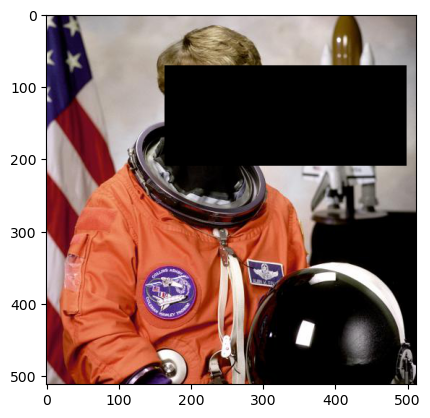

In [117]:
x = transforms.RandomErasing(p=0.75)
display_img(x.forward(img))